In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import common

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/alokjp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alokjp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('datasets/spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['label'])

df = df.drop_duplicates(keep='first')

In [6]:
df

,Unnamed: 0,label,text,label_num,Label
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0


In [7]:
ps = PorterStemmer()

In [8]:
df['imp_feature'] = df['text'].apply(common.getImportantFeatures)
df

,Unnamed: 0,label,text,label_num,Label,imp_feature
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,"[subject, enron, methanol, meter, 988291, this..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,"[subject, hpl, nom, for, january, 9, 2001, see..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,0,"[subject, neon, retreat, ho, ho, ho, we, re, a..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,1,"[subject, photoshop, windows, office, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,"[subject, re, indian, springs, this, deal, is,..."
...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,"[subject, put, the, 10, on, the, ft, the, tran..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,0,"[subject, 3, 4, 2000, and, following, noms, hp..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,"[subject, calpine, daily, gas, nomination, jul..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,"[subject, industrial, worksheets, for, august,..."


In [9]:
df['imp_feature'] = df['imp_feature'].apply(common.stopWordRemoval)
df

,Unnamed: 0,label,text,label_num,Label,imp_feature
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,"[subject, enron, methanol, meter, 988291, foll..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,"[subject, hpl, nom, january, 9, 2001, see, att..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,0,"[subject, neon, retreat, ho, ho, ho, around, w..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,1,"[subject, photoshop, windows, office, cheap, m..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,"[subject, indian, springs, deal, book, teco, p..."
...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,"[subject, put, 10, ft, transport, volumes, dec..."
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,0,"[subject, 3, 4, 2000, following, noms, hpl, ta..."
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,"[subject, calpine, daily, gas, nomination, jul..."
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,"[subject, industrial, worksheets, august, 2000..."


In [10]:
ps = PorterStemmer()
df['imp_feature'] = df['imp_feature'].apply(common.stem)
df

,Unnamed: 0,label,text,label_num,Label,imp_feature
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0,subject hpl nom januari 9 2001 see attach file...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,0,subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,1,subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0,subject indian spring deal book teco pvr reven...
...,...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,0,subject put 10 ft transport volum decreas 2500...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,0,subject 3 4 2000 follow nom hpl take extra 15 ...
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,0,subject calpin daili ga nomin juli mention ear...
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,0,subject industri worksheet august 2000 activ a...


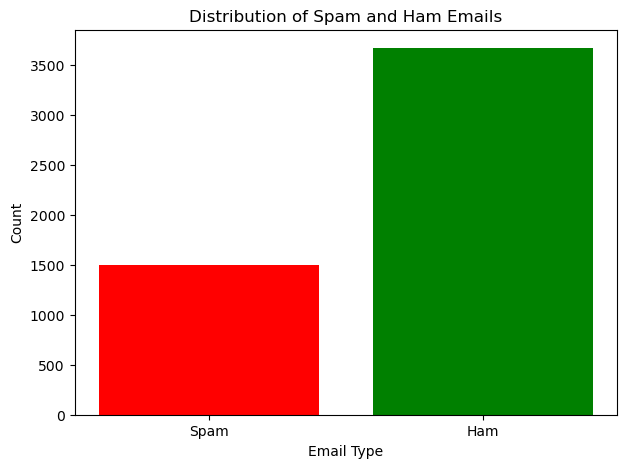

In [11]:
import matplotlib.pyplot as plt

# Count the number of spam and ham emails
spam_count = df[df['Label'] == 1].shape[0]
ham_count = df[df['Label'] == 0].shape[0]

# Data to plot
labels = ['Spam', 'Ham']
counts = [spam_count, ham_count]

# Create the bar chart
plt.figure(figsize=(7, 5))
plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()


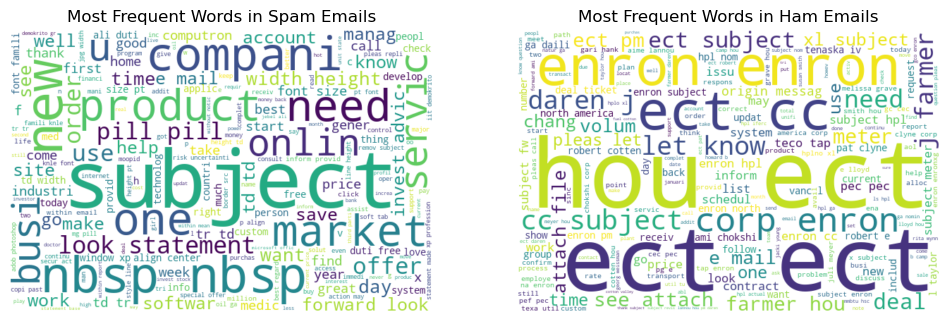

In [12]:

from wordcloud import WordCloud

# Combine all the spam and ham emails into two large text strings
spam_text = ' '.join(df[df['Label'] == 1]['imp_feature'])
ham_text = ' '.join(df[df['Label'] == 0]['imp_feature'])

# Create the word clouds
spam_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ham_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Spam Emails')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Ham Emails')

plt.show()


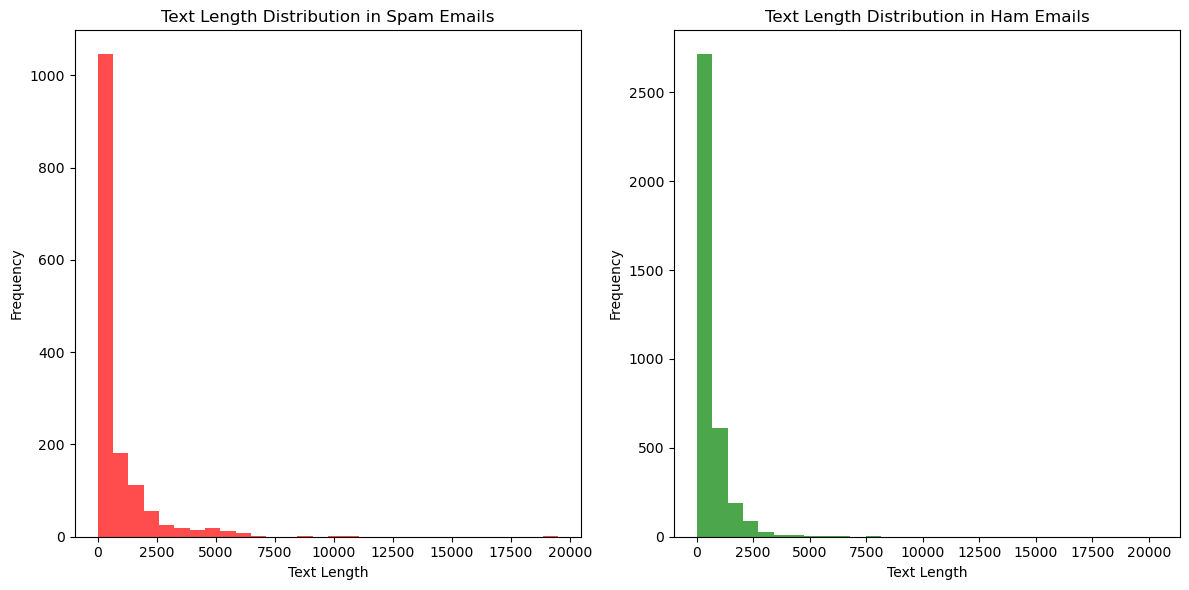

In [13]:
import matplotlib.pyplot as plt

# Calculate the lengths of the emails in both categories
df['text_length'] = df['imp_feature'].apply(len)

# Create separate data for spam and ham
spam_data = df[df['Label'] == 1]['text_length']
ham_data = df[df['Label'] == 0]['text_length']

# Create the histogram
plt.figure(figsize=(12, 6))

# Histogram for spam emails
plt.subplot(1, 2, 1)
plt.hist(spam_data, bins=30, color='red', alpha=0.7)
plt.title('Text Length Distribution in Spam Emails')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Histogram for ham emails
plt.subplot(1, 2, 2)
plt.hist(ham_data, bins=30, color='green', alpha=0.7)
plt.title('Text Length Distributions in Ham Emails')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [14]:

X = df['imp_feature']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:

tfidf = TfidfVectorizer()
feature = tfidf.fit_transform(X_train)

params = {'kernel':['linear','rbf'],'gamma':[1e-3,1e-4], 'C':[1,10,100,1000]}
 
model = GridSearchCV(svm.SVC(),params)
model.fit(feature, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [16]:
y_predict = tfidf.transform(X_test)
print("Accuracy:",model.score(y_predict,y_test)*100)
 
import joblib
joblib.dump(model, 'classifier.pkl')
joblib.dump(tfidf, 'vectorizer.pkl')

Accuracy: 99.07192575406032


['vectorizer.pkl']

In [17]:
msg = "the second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening"

In [18]:
arg1 = pd.DataFrame([msg])
arg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
dtypes: object(1)
memory usage: 136.0+ bytes


In [19]:
import os
print(os.path.join(os.path.dirname(os.path.abspath('')),'email-spam-detection/public/classifier.pkl'))
clf = joblib.load(os.path.join(os.path.dirname(os.path.abspath('')),'email-spam-detection/public/classifier.pkl'))
vectorizer = joblib.load(os.path.join(os.path.dirname(os.path.abspath('')),'email-spam-detection/public/vectorizer.pkl'))


message = arg1[0].apply(common.getImportantFeatures)
message = message.apply(common.stopWordRemoval)
message = message.apply(common.stem)
res = vectorizer.transform(message)


res = clf.predict(res)[0]
print(res)

/Users/alokjp/Desktop/email-spam-detection/public/classifier.pkl
0
